# Scipy - 求解微分方程组

作者：杨岱川

时间：2020年1月

github：https://github.com/DrDavidS/basic_Machine_Learning

开源协议：[MIT](https://github.com/DrDavidS/basic_Machine_Learning/blob/master/LICENSE)

## 洛伦兹方程组

我们以洛伦兹方程组为例，展示如何运用 Python 和开源库 `Scipy` 中的 `odeint` 模块求解微分方程组。

洛伦兹方程(Lorenz equation)最初是描述空气流体运动的一个简化微分方程组。1963年由美国气象学家洛伦兹(Lorenz,E. N.)提出。

后来，不只是在气象方面，在各种具有**混沌（Chaos）**性质的领域，洛伦兹方程组都有重要的应用。这里我们不深入探究，仅仅是就方程本身用 Python 快速实现一次。

>有兴趣的同学可以在知网搜索“洛伦兹方程”，有相当多的研究。

方程形式如下：

$$
\large
\begin{cases}
\cfrac{{\rm d}x}{{\rm d}t}=\sigma(y-x) \\[2ex]
\cfrac{{\rm d}y}{{\rm d}t}=x(\rho-z)-y\\[2ex]
\cfrac{{\rm d}z}{{\rm d}t}=xy - \beta z\\[2ex]
\end{cases}
$$

其中三个参数$\sigma$、$\rho$ 和 $\beta$ 取任意大于 0 的常数。

>在原始方程中，$\sigma$ 是无量纲因子，$\beta$ 是速度-阻尼常数，$\rho$是相对瑞利数。

代码实现和绘图如下：

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.integrate import odeint

%matplotlib inline

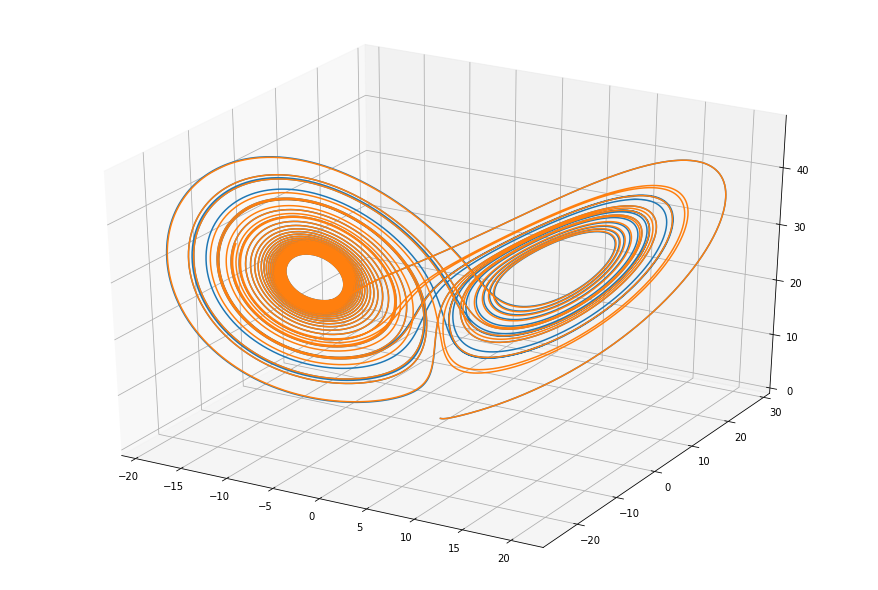

In [2]:
def lorenz(initPoint, trange, sets):
    """
    洛伦兹方程组
    
    @Param:
    sets:  sigma, rho, beta 参数
    Point: x, y, z 初始值
    """
    sigma, rho, beta = sets
    x,       y,    z = initPoint
    
    return np.array([sigma * (y - x),    # 方程1
                     x * (rho - z) - y,  # 方程2
                     x * y - beta * z])  # 方程3

# 以0.001有间隔，生成从0至30(不含)的等差数列，它代表了一组离散的时间点。
t = np.arange(0, 30, 0.001)

# 初始值P1  （x=0.0000, y=1.0000, z=0.0000）
# 超参数sets（sigma=11.0, rho=28.0, beta=3.0）
P1 = odeint(lorenz, (0.0000, 1.0000, 0.0000), t, args=([11., 28., 3.],))

# 初始值P2  （x=0.000, y=1.0001, z=0.000）
# 超参数sets（sigma=11.0, rho=28.0, beta=3.0）
P2 = odeint(lorenz, (0.0000, 1.0001, 0.0000), t, args=([11., 28., 3.],))

# 绘图
fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig)
ax.plot(P1[:, 0], P1[:, 1], P1[:, 2])
ax.plot(P2[:, 0], P2[:, 1], P2[:, 2])
plt.show()

可以看出，初值仅仅有微小的不同（$y$ 相差0.0001），在较长时间后，橙色线条和蓝色线条路径却大不相同。这就是大名鼎鼎的“**蝴蝶效应**”的由来。

## 传染病SEIR模型

参考链接：
[用Python实现经典传染病模型](https://zhuanlan.zhihu.com/p/104091330)
[仓室模型 - wiki](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SEIR_model)


流行病学中，常常使用 [仓室模型（Compartmental models）](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology)，又叫做房室模型或者库室模型，作为简化数学模型。其中很常用的一种仓室模型就是 SEIR 模型，所以我们用 Python 来实现一个 SEIR 模型，用以模拟2020年初武汉新型冠状病毒肺炎传播情况。

SEIR 将人群分为四类：

- **易感人群（Susceptible）**
- **潜伏（暴露）人群（Exposed）**
- **感染（确诊）人群（Infectious）** 
- **康复人群（Recover）**

假设 

1. SEIR 模型中，潜伏期是服从参数为 $a$ 的指数分布的随机变量，即平均潜伏期为 $a^{-1}$；
2. 出生率等于死亡率。

有如下模型：

$$
\large
\begin{cases}
\cfrac{{\rm d}S}{{\rm d}t} = -\beta \cfrac{IS}{N}\\[2ex]
\cfrac{{\rm d}E}{{\rm d}t} = \beta \cfrac{IS}{N} - \alpha E\\[2ex]
\cfrac{{\rm d}I}{{\rm d}t} = \alpha E - \gamma I\\[2ex]
\cfrac{{\rm d}R}{{\rm d}t} = \gamma R\\
\end{cases}
$$

其中：

- $\alpha$ 为隔离（确诊）速率，$\alpha = \cfrac{1}{T}$，$T$ 为平均潜伏期。
- $\beta$ 为感染者每天平均接触到的人数 $k$ 及接触时传染概率 $b$ 的乘积，即 $\beta = kb$；
- $\gamma$ 为感染者平均恢复或者死亡速率，$\gamma = \cfrac{1}{C}$，$C$ 为平均恢复时间。

这里就不详细给出参数的计算方法，根据公开资料和参考链接直接取得参数值：

- $\alpha = \cfrac{1}{C} = \cfrac{1}{7} = 0.1429$
- $\beta = kb = 5 \times 0.05214 = 0.2586$ ,注意这里应该是一个范围值。
- $\gamma = \cfrac{1}{T} = \cfrac{1}{14} =  0.07143$

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

%matplotlib inline

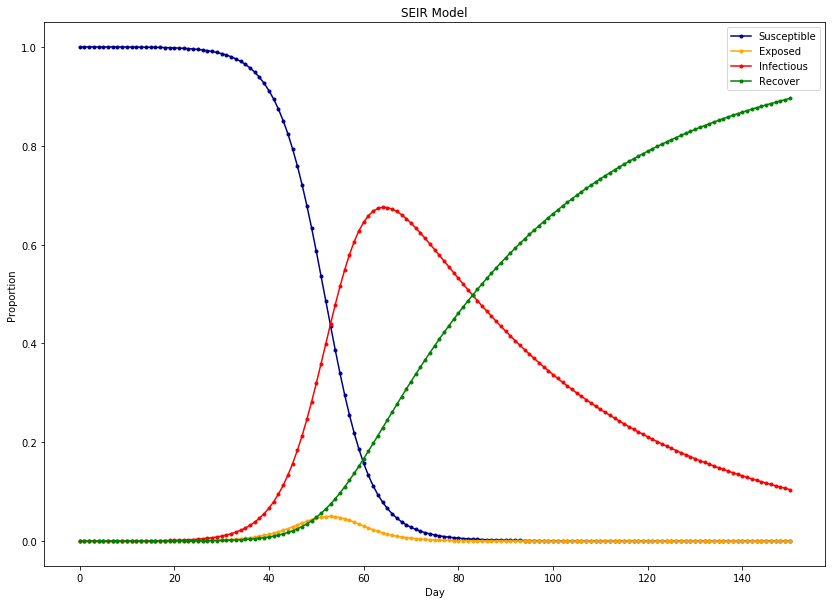

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

%matplotlib inline

beta = 0.2607                  # 疾病传播概率
gamma_1 = 0.0001               # 潜伏期治愈率，如果存在没有发病自己好了的情况
gamma_2 = 0.0235               # 感染者治愈率
alpha = 1                      # 潜伏期发展为患者的比例

I_0 = 1e-6                     # 初始状态：感染个体比例
E_0 = I_0 * 41                 # 初始状态：潜伏期个体比例，41为估计值
R_0 = 1e-6 / 2                 # 初始状态：治愈个体比例
S_0 = 1 - I_0 - E_0 - R_0      # 初始状态：易感个体比例
T = 150                        # 整体时间周期

INI = (S_0, E_0, I_0, R_0)        # 各个群体初始状态


def SEIR(initProp, trange):
    """
    @param:
    initProp:  初始状态
    trange: 时间范围
    """
    Y = np.zeros(4)
    S_0, E_0, I_0, R_0 = initProp
    
    # 易感个体变化
    Y[0] = - beta * I_0 * S_0 
    
    # 潜伏期个体变化
    Y[1] = beta * I_0 * S_0 - (alpha + gamma_1) * E_0
    
    # 感染个体变化
    Y[2] = alpha * E_0 - gamma_2 * I_0

    # 治愈个体变化
    Y[3] = gamma_1 * E_0 + gamma_2 * I_0
    
    return np.array([Y[0], Y[1], Y[2], Y[3]])

T_range = np.arange(0, T + 1, 1)

RES = odeint(SEIR, INI, T_range)


plt.figure(figsize=(14,10))
plt.plot(RES[:, 0], color = 'darkblue',label = 'Susceptible',marker = '.')
plt.plot(RES[:, 1], color = 'orange',  label = 'Exposed',    marker = '.')
plt.plot(RES[:, 2], color = 'red',     label = 'Infectious', marker = '.')
plt.plot(RES[:, 3], color = 'green',   label = 'Recover',    marker = '.')
plt.title('SEIR Model')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Proportion')
plt.show()